[[1180 1164 1173 ... 1021 1037 1082]
 [1190 1124 1142 ... 1040 1076 1084]
 [1212 1158 1141 ... 1044 1027 1033]
 ...
 [1176 1122 1151 ... 1076 1198 1109]
 [1197 1164 1197 ... 1077 1073 1091]
 [1216 1155 1209 ... 1087 1116 1088]]


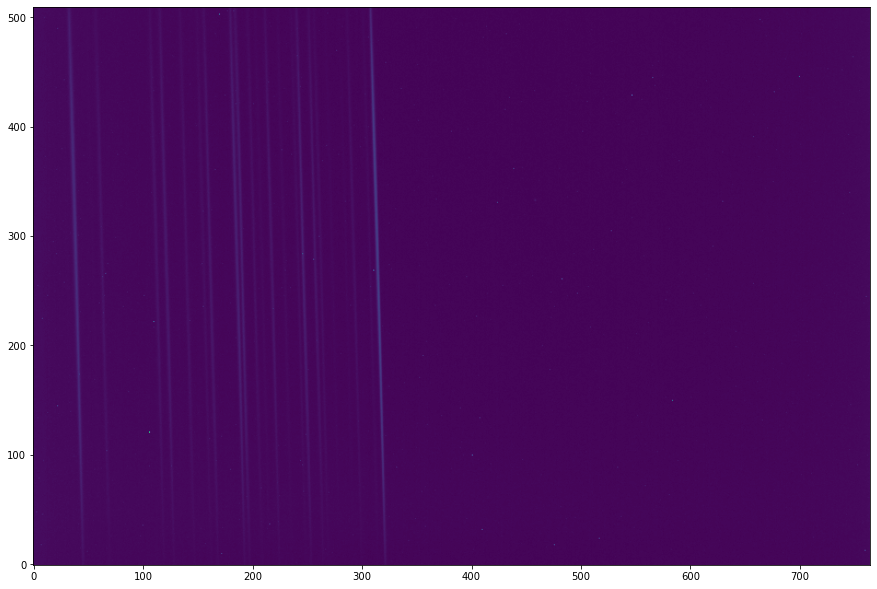

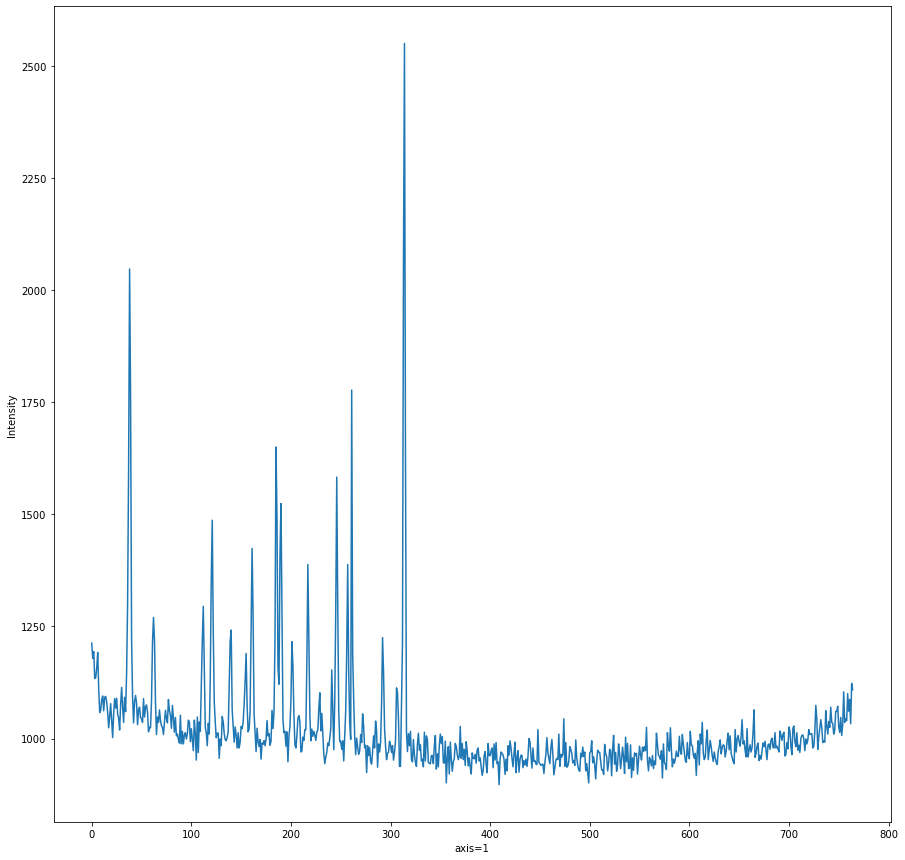

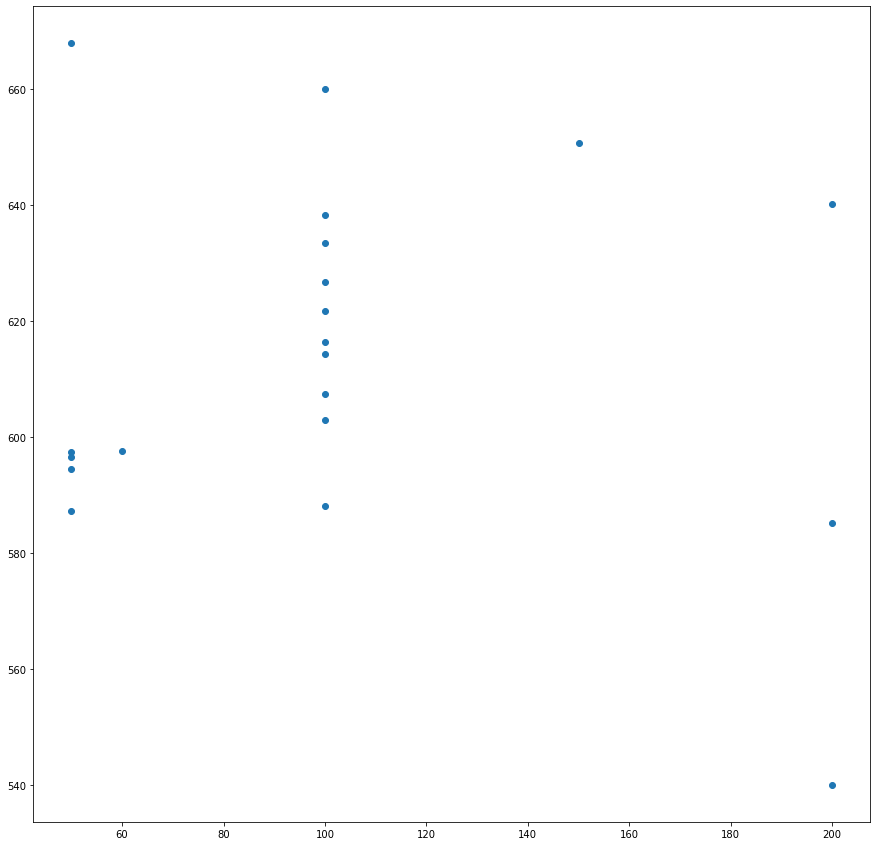

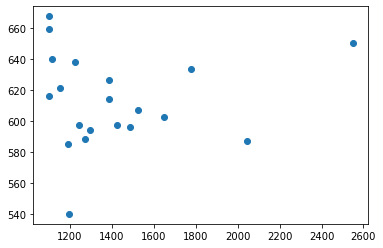

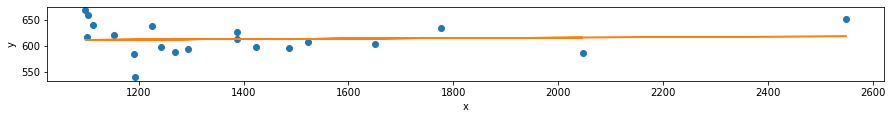

0.004583423020809718 606.8592527978872


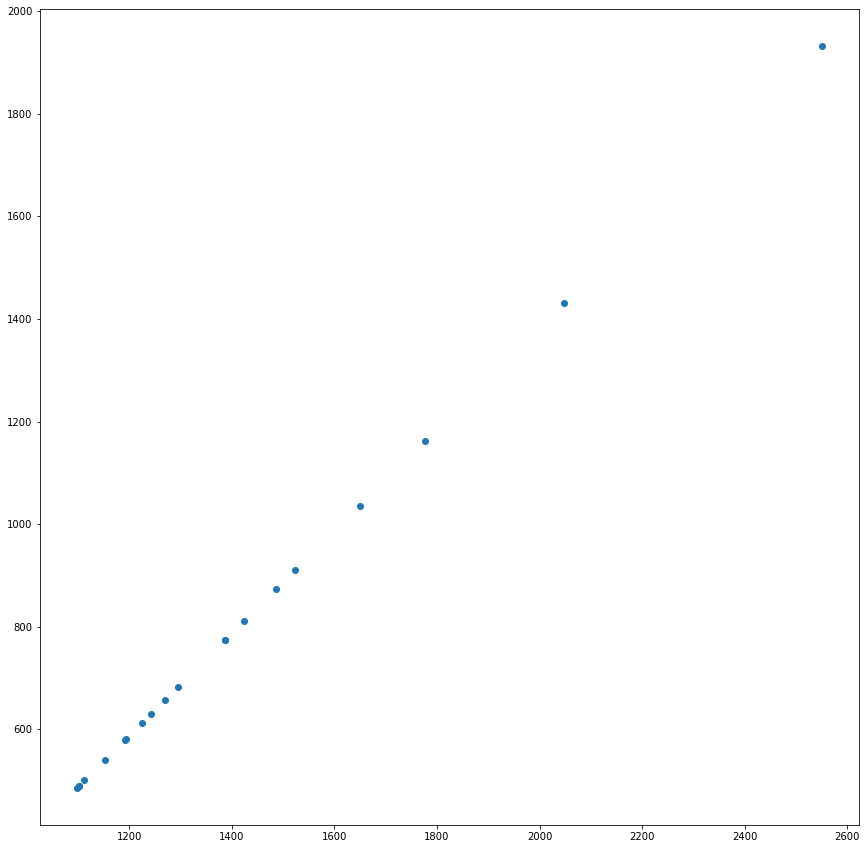

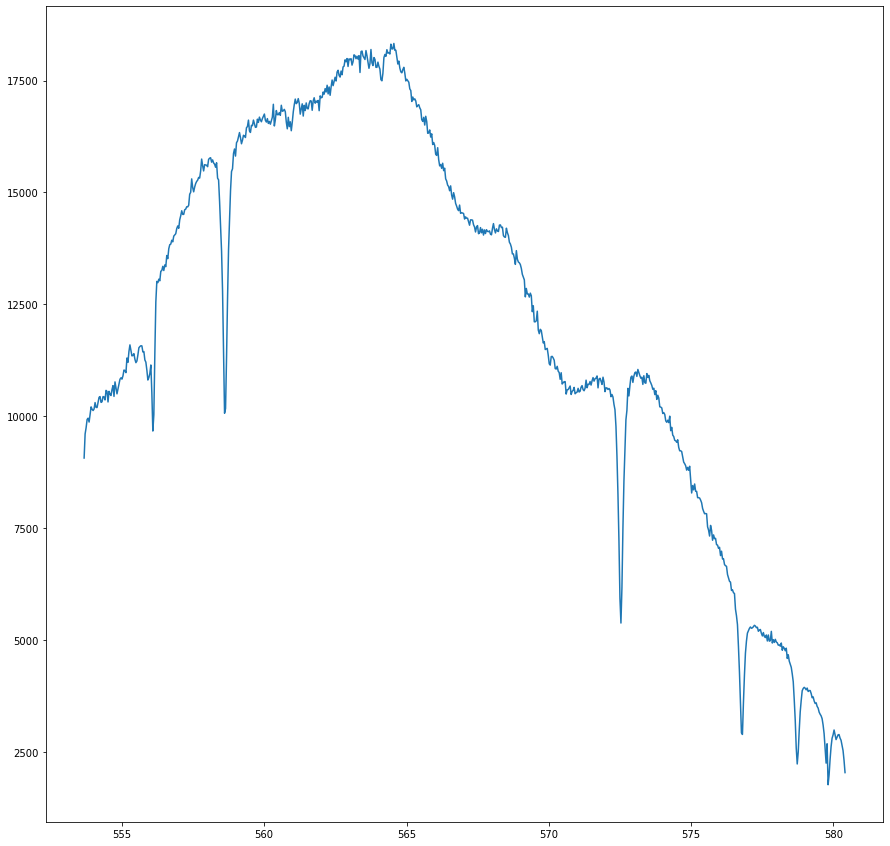

In [13]:
#Telescope_data

#Neon_calibration_data


from astropy import units as u
import numpy as np
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.io import fits

#-------------------------------
 #flat frames avereging for 120 ex time data
 
 

 

path2data = 'flat1.fit'
hdu = fits.open(path2data)
hdu[0].header
data1 = hdu[0].data
#print(data1)


path2data = 'flat2.fit'
hdu = fits.open(path2data)
hdu[0].header
data2 = hdu[0].data
#print(data2)


path2data = 'flat3.fit'
hdu = fits.open(path2data)
hdu[0].header
data3 = hdu[0].data
#print(data3)


path2data = 'flat4.fit'
hdu = fits.open(path2data)
hdu[0].header
data4 = hdu[0].data
#print(data4)


path2data = 'flat5.fit'
hdu = fits.open(path2data)
hdu[0].header
data5 = hdu[0].data
#print(data5)

Avgflat = (data1+data2+data3+data4+data5)/5
    
#print("Avg flat Data=", Avgflat[300,:])
 #-------------------------------
 #dark frames avereging for 120 ex time data
 
 

 

path2data = 'dark1_120.fit'
hdu = fits.open(path2data)
hdu[0].header
data1 = hdu[0].data
#print(data1)


path2data = 'dark2_120.fit'
hdu = fits.open(path2data)
hdu[0].header
data2 = hdu[0].data
#print(data2)


path2data = 'dark3_120.fit'
hdu = fits.open(path2data)
hdu[0].header
data3 = hdu[0].data
#print(data3)


path2data = 'dark4_120.fit'
hdu = fits.open(path2data)
hdu[0].header
data4 = hdu[0].data
#print(data4)


path2data = 'dark5_120.fit'
hdu = fits.open(path2data)
hdu[0].header
data5 = hdu[0].data
#print(data5)

AvgDark = (data1+data2+data3+data4+data5)/5
    
#print("Avg Dark Data=", AvgDark[300,:])
#---------------------------------------------------


path2data = 'Neon.fit'
hdu = fits.open(path2data)
hdu[0].header
data = hdu[0].data
print(data)



fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(data, origin='lower')
plt.show()



fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(data[300, :])
ax.set_xlabel('axis=1')
ax.set_ylabel('Intensity')
plt.show()



peaks_neon, _ = find_peaks(data[300,:], height=1096)

new =  np.loadtxt('new20.txt')

Tableus = np.loadtxt('Table.txt', skiprows=0, delimiter='\t')
#print(Tableus)
plt.figure(5,figsize=(15,15))
plt.scatter(Tableus[:,0],Tableus[:,1])
plt.show()

peaks_Tableus, _ = find_peaks(Tableus[:,1], height=1100)
#print(peaks_Tableus)

plt.scatter(new, Tableus[:,1])
plt.show()



ye= Tableus[:,1]
x = new
nx = 20 # Number of data points
m = 0 # Gradient  
c = 0.0 # Intercept


y = m * x + c
sigma = 1.0


plt.figure(6,figsize=(15,15))
plt.plot(x,ye,'o',label='data') 
plt.xlabel('x')
plt.ylabel('y') 
#plt.show()

ma = np.array([ [np.sum(x**2), np.sum(x)],[np.sum(x), nx ]]) 
mc = np.array([ [np.sum(x*ye)],[np.sum(ye)]]) 

mai = np.linalg.inv(ma)
#print ('Test matrix inversion gives identity',np.dot(mai,ma))
md = np.dot(mai,mc)


mfit = md[0,0]
cfit = md[1,0]
plt.plot(x, mfit*x + cfit)

plt.axis('scaled')

plt.show()
print(mfit,cfit)


#----------------------------------
#difference regression 

plt.figure(16,figsize=(15,15))

plt.scatter(x,new-(mfit*x + cfit))
plt.axis('scaled')

plt.show()


#---------------------------------------------------
#vega
m=0.035
c=553.67
path2data = 'Vega.fit'
hdu = fits.open(path2data)
hdu[0].header
data = hdu[0].data
#print(data)

pixel = np.loadtxt(fname = 'pixel.txt')

plt.figure(16,figsize=(15,15))
plt.plot((pixel[:,0])*m+c,data[340,:])

plt.show()


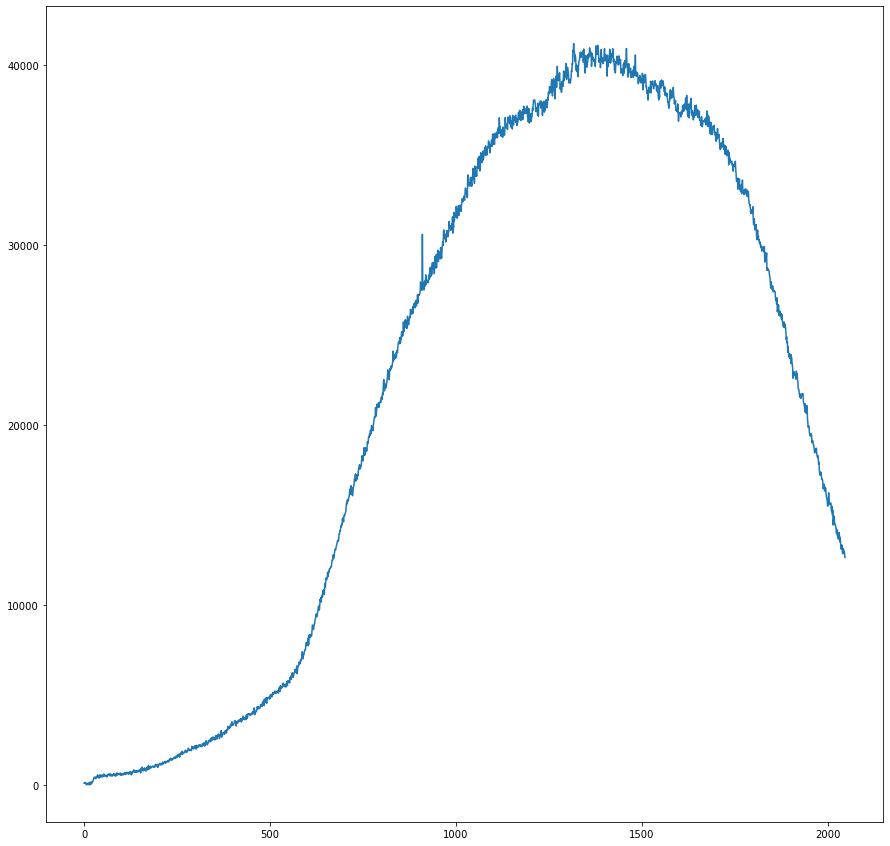

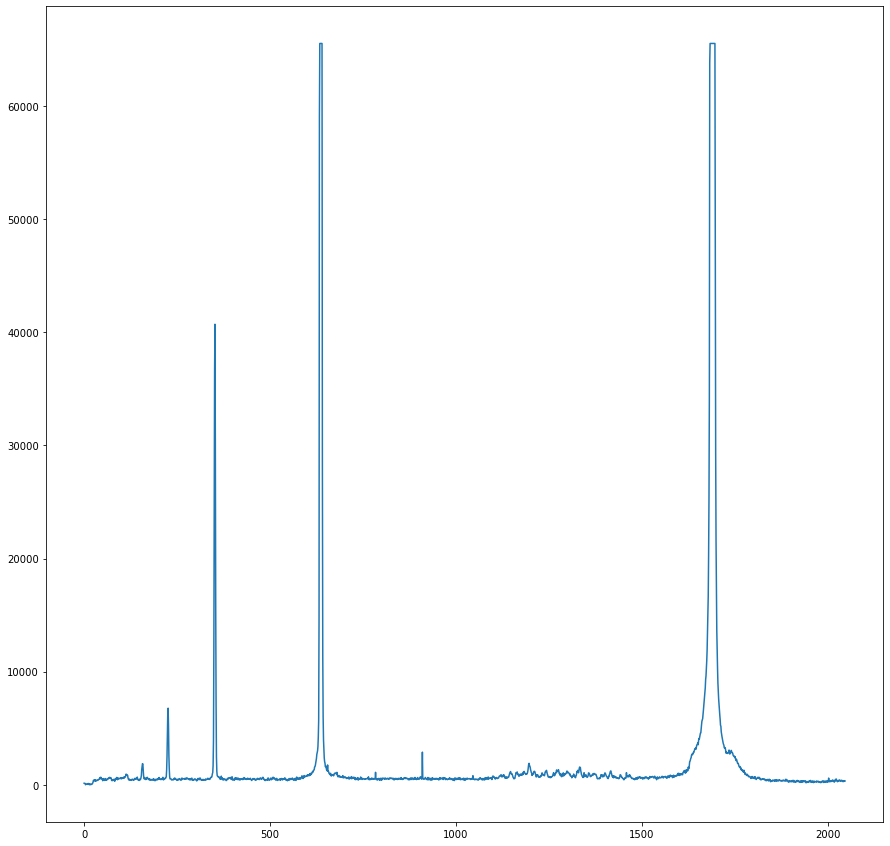

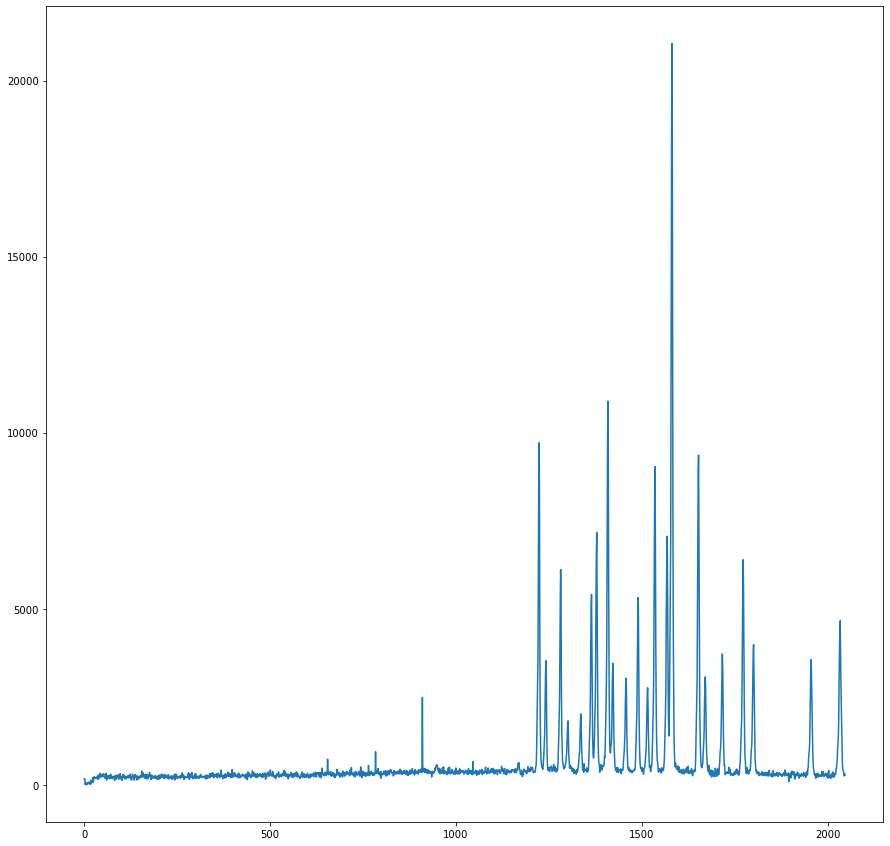

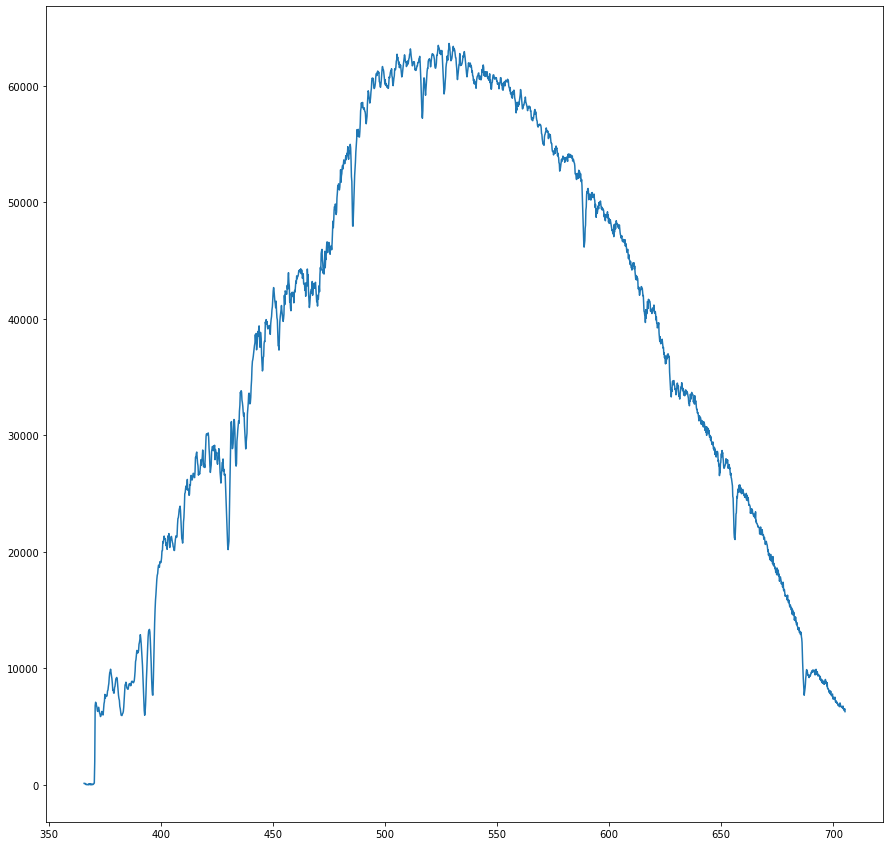

lin_params and covariance: [  19.04133792 2608.5083666 ], [[ 1.30877911e-01 -1.33953543e+02]
 [-1.33953543e+02  1.82846588e+05]]


(Text(0.5, 0, 'first'), Text(0, 0.5, 'second'))

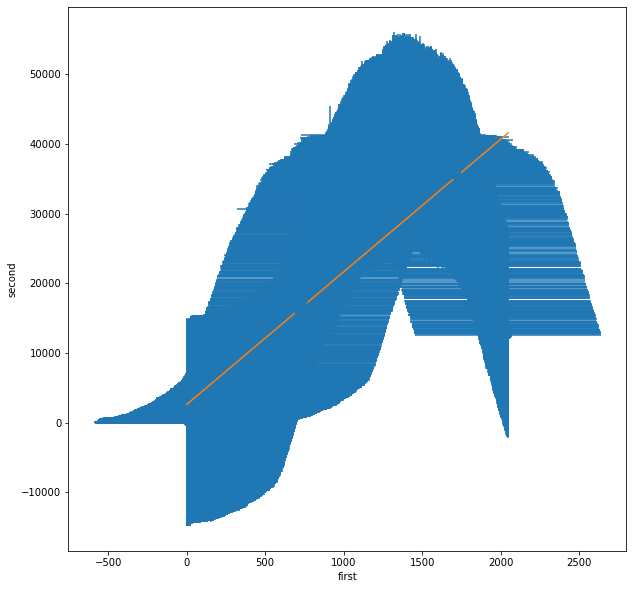

In [12]:
#Data set 1 

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


#----------------------------------------------------------------
#importing Bulb Data
Bulb_data = np.loadtxt(fname = 'Group C - Bulb.txt', delimiter = '\t', skiprows = 17)


plt.figure(1,figsize=(15,15))
#plt.errorbar(Bulb_data[0], np.log(rad_data), xerr = None, yerr = (rad_unc/rad_data), fmt = 'o')
plt.plot(Bulb_data[:,0], Bulb_data[:,1])

#plt.xlabel('Sample Number'), plt.ylabel('Log of Number of Counts')
plt.show()



#------------------------------------------------------------------------
#importing Purple Data
Purple_data = np.loadtxt(fname = 'Group C - Purple.txt', delimiter = '\t', skiprows = 17)


plt.figure(2,figsize=(15,15))
#plt.errorbar(Bulb_data[0], np.log(rad_data), xerr = None, yerr = (rad_unc/rad_data), fmt = 'o')
plt.plot(Purple_data[:,0], Purple_data[:,1])

#plt.xlabel('Sample Number'), plt.ylabel('Log of Number of Counts')
plt.show()
#--------------------------------------------------------------------------


#importing Red Data
Red_data = np.loadtxt(fname = 'Group C - Red.txt', delimiter = '\t', skiprows = 17)


plt.figure(3,figsize=(15,15))
#plt.errorbar(Bulb_data[0], np.log(rad_data), xerr = None, yerr = (rad_unc/rad_data), fmt = 'o')
plt.plot(Red_data[:,0], Red_data[:,1])

#plt.xlabel('Sample Number'), plt.ylabel('Log of Number of Counts')
plt.show()




#--------------------------------------------------------------------------


#importing Sun Data
Sun_data = np.loadtxt(fname = 'Group C - Sun.txt', delimiter = '\t', skiprows = 17)


plt.figure(4,figsize=(15,15))
#plt.errorbar(Bulb_data[0], np.log(rad_data), xerr = None, yerr = (rad_unc/rad_data), fmt = 'o')
plt.plot(Sun_data[:,0], Sun_data[:,1])

#plt.xlabel('Sample Number'), plt.ylabel('Log of Number of Counts')
plt.show()



def lin_func(x, a, b):
    """
    param x: data to perform regression on
    param a: slope param
    param b: intercept
    return: set of y data using the function
    """
    
    return a * x + b

def exp_func(x, a, b):
    """
    param x: data to perform regression
    param a: derivative at 0
    param b: intercept
    """
    
    return a * x ** b

def chi_squared_linear (dof, x, y, sigma, a, b):
    """
    Returns chi squared of a linear model
    
    :param: dof, degrees of freedom of the data
    :param: x, independent data set
    :param: y, dependent data set
    :param: sigma, measurement error in y
    :param: a, slope parameter in model
    :param: b, intercept parameter in model
    """
    
    chi_squared = (1/dof) * np.sum((((y) - lin_func(x, a, b))/(sigma))**2)
    print((y) - lin_func(x, a, b))
    #print(np.sum(((y/1000 - lin_func(x, a, b))/(sigma/1000))**2))
    #print(lin_func(x,a,b))
    return chi_squared


def mean(Bulb_data):
    
   return sum(Bulb_data)/len(Bulb_data)



mean_value= mean(Bulb_data)



def SD(Bulb_data):
    
    return (sum(((Bulb_data-mean(Bulb_data)))**(2))/(len(Bulb_data)-1))**(1/2)

SD_value= SD(Bulb_data)


# data.sort_values(columns = ['Voltage(V)', 'Current(mA)', 'Uncertainty (Voltage)', 'Uncertainty(Current)'], axis = 1, ascending = True, inplace = True)
first = Bulb_data[:,0]
#first = first.sort_values() # have to manually sort these all because pandas keeps throwing keyerrors
second = Bulb_data[:,1]
#second = second.sort_values()
first_unc = SD(Bulb_data[:,0])
#first_unc = first_unc.sort_values()
second_unc = SD(Bulb_data[:,1])
#second_unc = second_unc.sort_values()

lin_params, p_cov_lin = curve_fit(lin_func, first, second)
#exp_params, p_cov_exp = curve_fit(exp_func, voltage, current)

print(f"lin_params and covariance: {lin_params}, {p_cov_lin}")
#print(f"exp_params and covariance: {exp_params}, {p_cov_exp}")

lin_y_val = lin_func(first, lin_params[0], lin_params[1])
#exp_y_val = exp_func(voltage, exp_params[0], exp_params[1])
#exp_y_val = exp_y_val.sort_values()

#theor_y_val_lin = np.log(voltage ** (3/5)) + lin_params[1]
#theor_y_val_lin = theor_y_val_lin.sort_values()
#theor_y_val_exp = voltage ** (3/5) * exp_params[0] + exp_params[1]
#theor_y_val_exp = theor_y_val_exp.sort_values()

#var_lin_a = p_cov_lin[0,0]
#var_lin_b = p_cov_lin[1,1]

#var_exp_a = p_cov_exp[0,0]
#var_exp_b = p_cov_exp[1,1]

#print(f"linreg y values: {lin_y_val}", f"exp y values: {exp_y_val}")

#dof = len(data) - 2 # degrees of freedom
#print(lin_params[0],lin_params[1])
#chi_squared = chi_squared_linear(dof, voltage, current, cur_unc, lin_params[0], lin_params[1])
#print("chi_squared=", np.log(chi_squared))

# Plotting linear regression of ln(x) and ln(y):

plt.figure(1,figsize = (10, 10))
plt.errorbar(first, second, xerr = first_unc, yerr = second_unc, fmt = 'o')
plt.plot(first, lin_y_val)
#plt.plot(np.log(voltage), theor_y_val_lin)
plt.xlabel("first"), plt.ylabel('second')
#plt.savefig('Log-log (data)', format = 'png')

# Plotting exponential regression of x and y:

#plt.figure(2,figsize  = (10, 10))
#plt.errorbar(voltage, current, xerr = volt_unc, yerr = cur_unc, fmt = 'o')
#plt.plot(voltage, exp_y_val)
#plt.plot(voltage, theor_y_val_exp)
#plt.xlabel('Voltage(V)'), plt.ylabel('Current(mA)')
#plt.savefig('No log', format = 'png')

# Same thing but logging the axes instead of the values

#plt.figure(3, figsize = (10, 10))
#plt.errorbar(voltage, current, xerr = volt_unc, yerr = cur_unc, fmt = 'o')
#plt.plot(voltage, exp_y_val)
#plt.plot(voltage, theor_y_val_exp)
#plt.yscale('log'), plt.xscale('log')
#plt.xlabel('Voltage(V)'), plt.ylabel('Current(mA)')
#plt.savefig('Log-log (axes)', format = 'png')
#plt.show()

#print("avg linear y value", np.average(lin_y_val))
#print("avg exp y value", np.average(exp_y_val))
#print("avg thoer y value linear", np.average(theor_y_val_lin))
#print("avg thoer y value exp", np.average(theor_y_val_exp))

